In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [9]:
X, y = load_boston(return_X_y=True)
df = pd.DataFrame(X)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df['MEDV'] = y

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


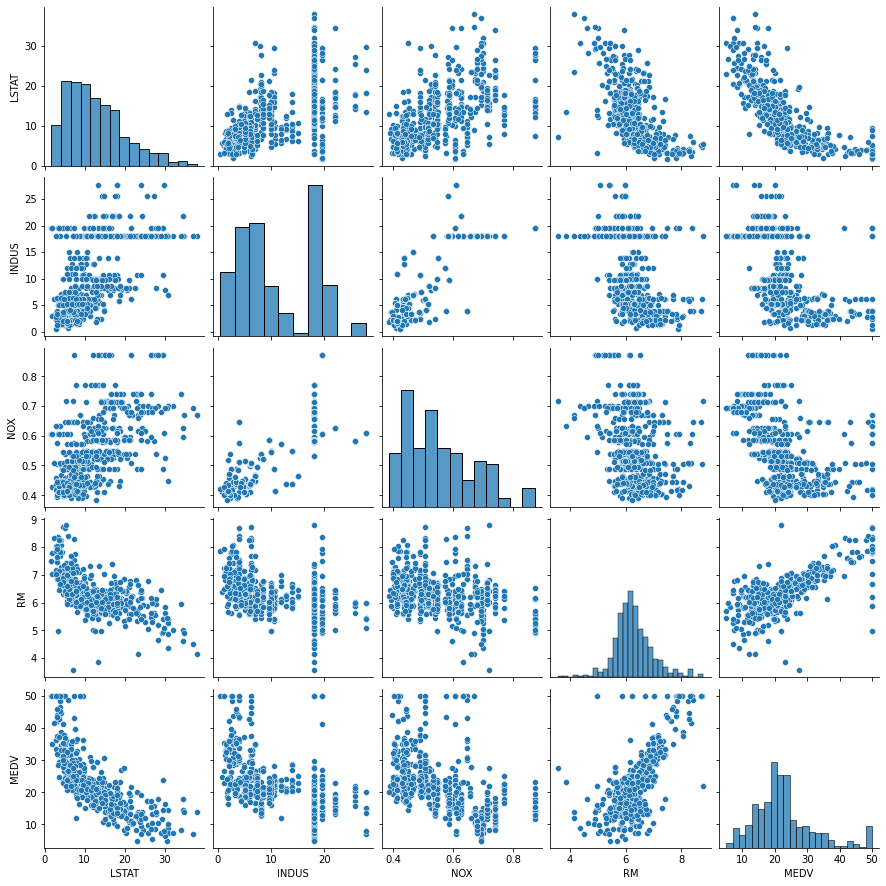

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)

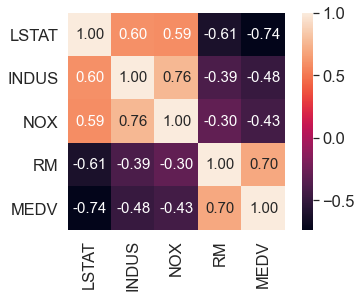

In [11]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.show()


In [13]:
from LinearRegressionGD import LinearRegressionGD
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

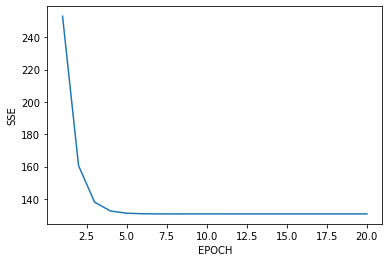

In [14]:
sns.reset_orig()
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel("SSE")
plt.xlabel('EPOCH')
plt.show()

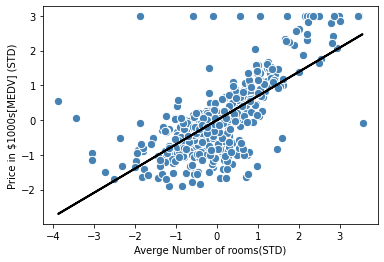

In [15]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

lin_regplot(X_std, y_std, lr)
plt.xlabel("Averge Number of rooms(STD)")
plt.ylabel("Price in $1000s[MEDV] (STD)")
plt.show()

In [24]:
num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f" % sc_y.inverse_transform([price_std]))

Price in $1000s: 10.840


Slope: 9.102
Intercept: -34.671


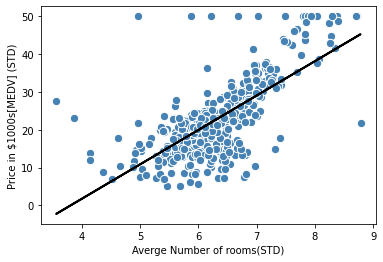

In [26]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print("Slope: %.3f" % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

lin_regplot(X, y, slr)
plt.xlabel("Averge Number of rooms(STD)")
plt.ylabel("Price in $1000s[MEDV] (STD)")
plt.show()

In [27]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='absolute_loss', residual_threshold=5.0, random_state=0)
ransac.fit(X, y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ransac.py:354: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


RANSACRegressor(base_estimator=LinearRegression(), loss='absolute_loss',
                min_samples=50, random_state=0, residual_threshold=5.0)

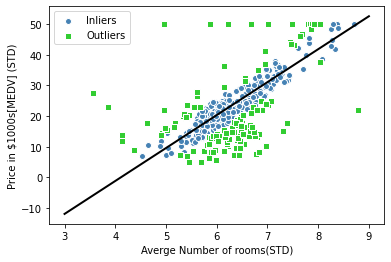

Slope: 10.735
Intercept: -44.089


In [29]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolors='white', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', edgecolors='white', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel("Averge Number of rooms(STD)")
plt.ylabel("Price in $1000s[MEDV] (STD)")
plt.legend(loc='upper left')
plt.show()

print("Slope: %.3f" % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

In [30]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

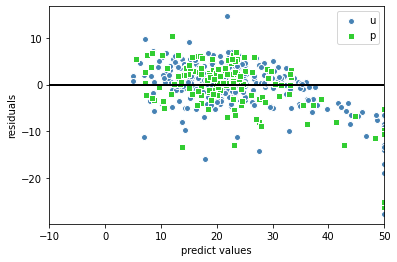

In [31]:
plt.scatter(y_train, y_train_pred - y_train, c='steelblue', marker='o', edgecolors='white', label='Training data')
plt.scatter(y_test, y_test_pred - y_test, c='limegreen', marker='s', edgecolors='white', label='Test data')
plt.xlabel("predict values")
plt.ylabel("residuals")
plt.legend('upper left')
plt.hlines(y = 0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

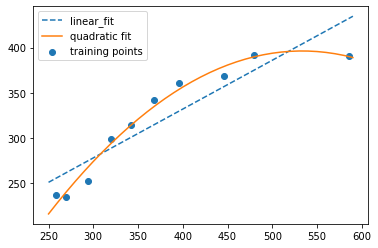

Training MSE linear: 568.948, quadratic: 61.350
Training R^2 linear: 0.832, quadratic: 0.982


In [36]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.9])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear_fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

from sklearn.metrics import mean_squared_error, r2_score
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print("Training MSE linear: %.3f, quadratic: %.3f" % (mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))
print("Training R^2 linear: %.3f, quadratic: %.3f" % (r2_score(y, y_lin_pred), r2_score(y, y_quad_pred)))

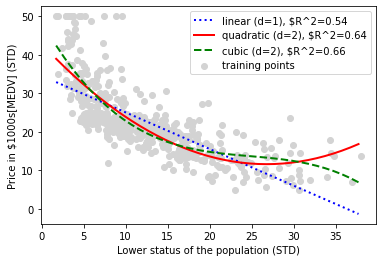

In [39]:
X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f' % linear_r2, color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2), $R^2=%.2f' % quadratic_r2, color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=2), $R^2=%.2f' % cubic_r2, color='green', lw=2, linestyle='--')
plt.xlabel("Lower status of the population (STD)")
plt.ylabel("Price in $1000s[MEDV] (STD)")
plt.legend(loc='upper right')
plt.show()

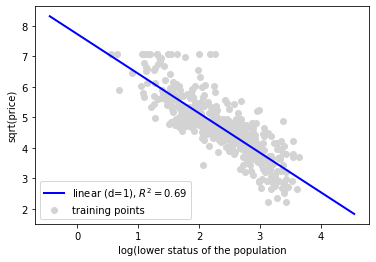

In [40]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)
X_fit = np.arange(X_log.min() -1, X_log.max() +1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2)
plt.xlabel('log(lower status of the population')
plt.ylabel('sqrt(price)')
plt.legend(loc='lower left')
plt.show()

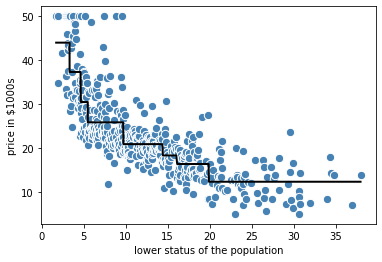

In [42]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('lower status of the population')
plt.ylabel('price in $1000s')
plt.show()

In [45]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print("MSE train: %.3f, test: %.3f" % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print("R2 train: %.3f, test: %.3f" % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


MSE train: 1.644, test: 11.085
R2 train: 0.979, test: 0.877


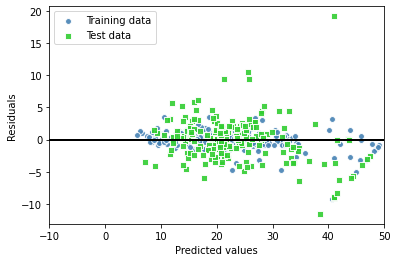

In [48]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', edgecolors='white', marker='o', s=35, alpha=0.9,label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', edgecolors='white', marker='s', s=35, alpha=0.9,label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.show()